<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/FR_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_FR = pd.read_csv('../datasets/FR_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_FR = youtube_data_FR.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_FR.columns:
    youtube_data_clean_FR['description'] = youtube_data_clean_FR['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_FR.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_FR.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_FR[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_FR.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_FR.head(3))

# This clean dataframe (youtube_data_clean_BR) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268646, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_FR.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_FR.columns:
    print(f"{col}: {youtube_data_FR[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 54170 unique values
title: 55528 unique values
publishedAt: 53128 unique values
channelId: 6002 unique values
channelTitle: 6300 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 37207 unique values
view_count: 221846 unique values
likes: 87832 unique values
dislikes: 7862 unique values
comment_count: 21794 unique values
thumbnail_link: 54170 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 53852 unique values


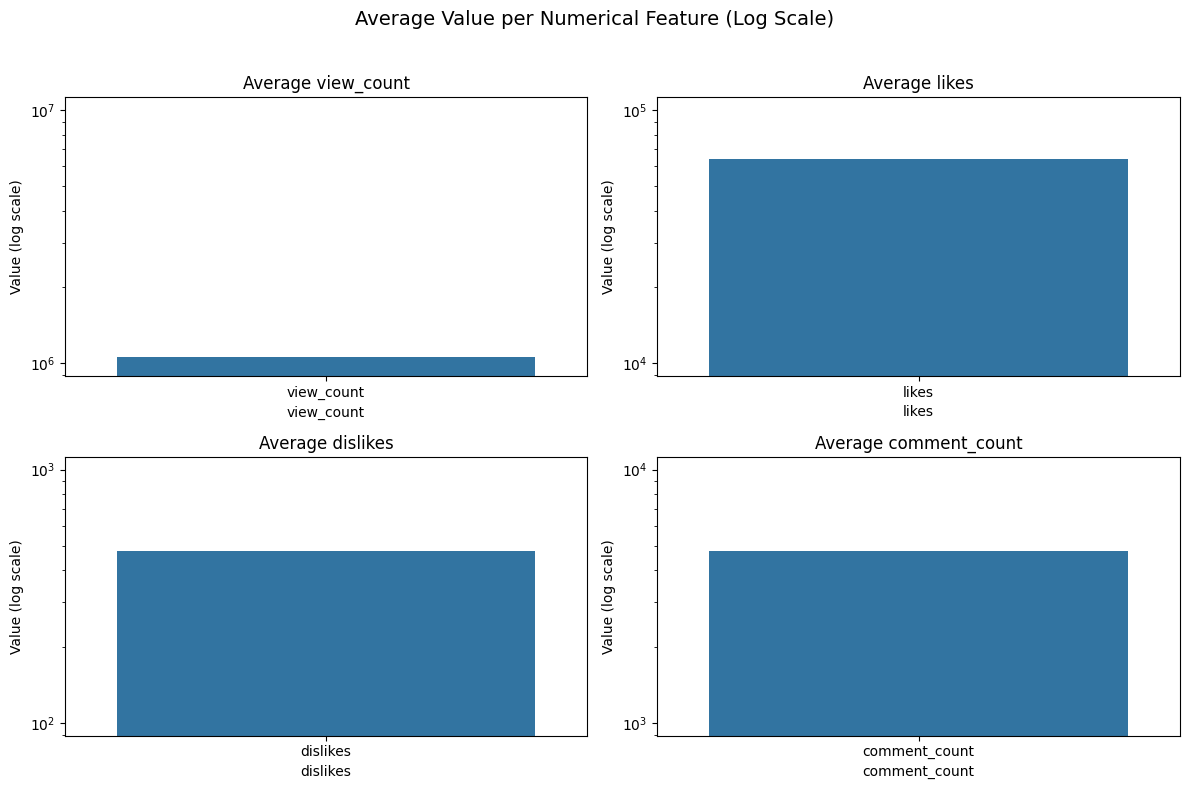

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_FR[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

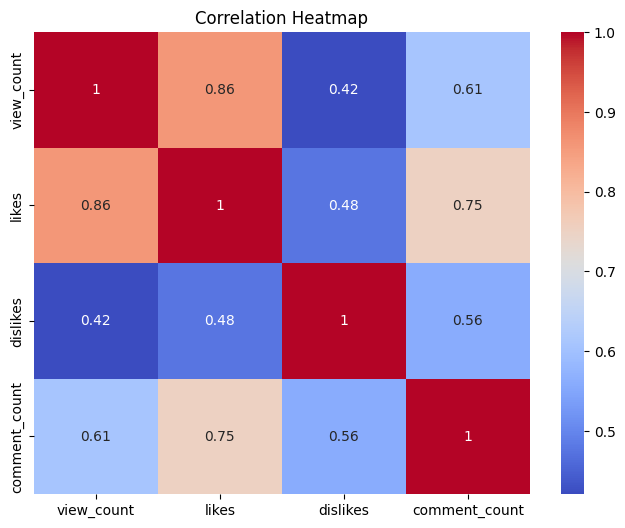

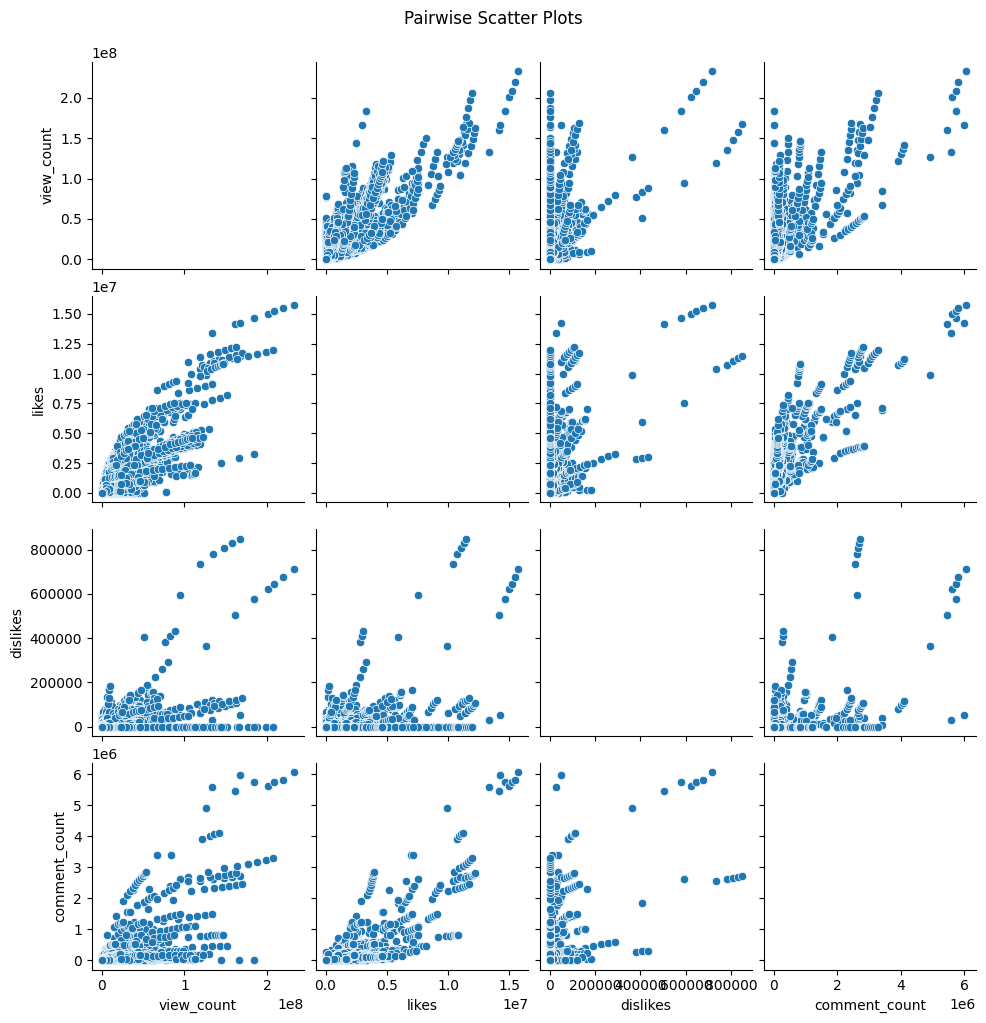

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_FR[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_FR[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


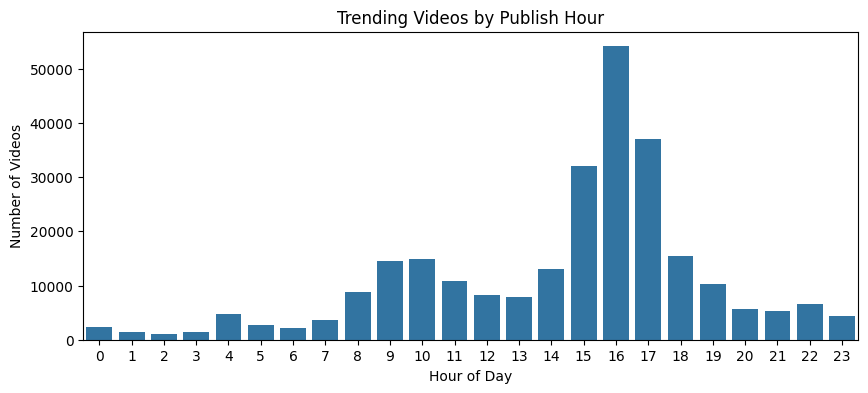

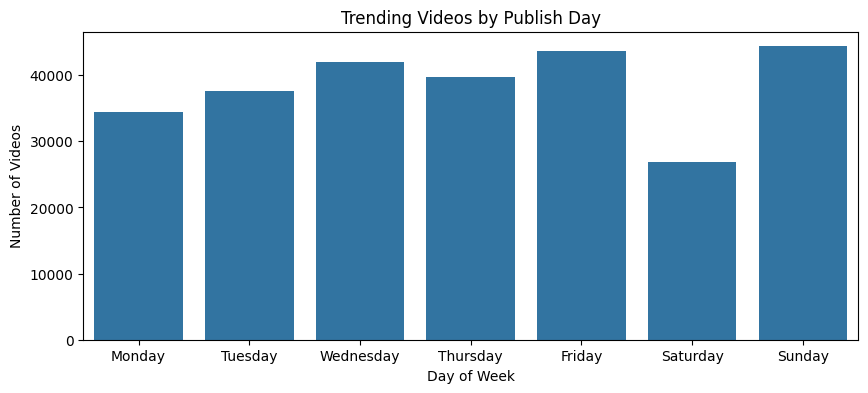

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_FR.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_FR.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_FR[datetime_col].dtype, np.datetime64):
    youtube_data_FR[datetime_col] = pd.to_datetime(youtube_data_FR[datetime_col])

# Extract hour and day of week
youtube_data_FR['publish_hour'] = youtube_data_FR[datetime_col].dt.hour
youtube_data_FR['publish_day'] = youtube_data_FR[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_FR)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_FR, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


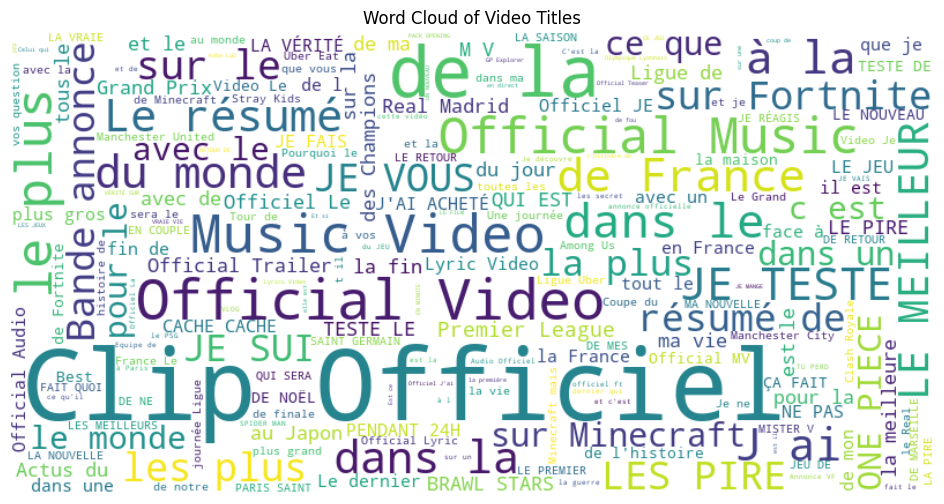

Most common tags:
humour (humor): 12167
football (soccer): 7585
fun: 4984
drole (funny): 4807
vlog: 4737
france (France): 4674
challenge: 4323
highlights: 3985
rap: 3888
fr (FR (France)): 3778


In [8]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_FR['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
# Portuguese-to-English translation dictionary
tag_translation_fr = {
    'humour': 'humor',
    'football': 'soccer',
    'fun': 'fun',
    'drole': 'funny',
    'vlog': 'vlog',
    'france': 'France',
    'challenge': 'challenge',
    'highlights': 'highlights',
    'rap': 'rap',
    'fr': 'FR (France)',
}

all_tags = ','.join(youtube_data_FR['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    translated = tag_translation_fr.get(tag, tag)
    if tag != translated:
        print(f'{tag} ({translated}): {count}')
    else:
        print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [9]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate French->English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_FR[col].quantile(0.25)
    q3 = youtube_data_FR[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_FR[(youtube_data_FR[col] < lower) | (youtube_data_FR[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 232649205
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 219110491
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 208581468

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15735588
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15460862
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS (Bulletproof Boys) ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15246540

Top Outliers for dis

# Summary and Insights
Based on the EDA performed on the FR (French) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains approximately 260,000 trending video records from France, encompassing rich metadata and user engagement metrics.
- After duplicate removal and format standardization, the cleaned dataset (youtube_data_clean_FR) was prepared for in-depth analysis.
- Key fields include video titles, channel identifiers, timestamps, category IDs, tags, and engagement statistics (view_count, likes, dislikes, comments).

**2. Feature Understanding:**
- Primary quantitative features: view_count, likes, dislikes, and comment_count
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date supported daily and hourly pattern analysis.
- Text fields were valuable for tracking trends in French-language media, humor, and music genres.

**3. Univariate Analysis:**
- Engagement metrics (views, likes, comments) followed a heavy right-skewed distribution, with only a small proportion of videos achieving exceptionally high reach.
- Most videos fell into moderate engagement ranges, while outliers skewed the mean significantly—highlighting the nature of viral content dynamics.
- The category distribution showed strong representation in music, humor, vlogs, and sports, mirroring common viewer interests in French YouTube culture.

**4. Bivariate/Multivariate Analysis:**
- Likes and views maintained a strong positive correlation, reinforcing the use of early engagement as a key performance indicator.
- Comments also trended positively with views, though with slightly more variability than likes.
- Dislikes had weak correlation with other metrics, similar to patterns seen in BR and DE datasets—likely indicating that negative sentiment doesn’t scale with exposure.
- Multivariate scatterplots highlighted nonlinearities and banded clusters in the data, potentially linked to external influences like trending algorithms or coordinated fandom behavior.

**5. Temporal Analysis:**
- Publishing times peaked between noon and early evening, suggesting that French creators optimize release schedules for afternoon engagement windows.
- Many trending videos were published the same day or 1–2 days before trending, indicating fast engagement cycles.
- Day-of-week analysis showed a fairly even spread, though slight bumps on Wednesday and Saturday may reflect active midweek and weekend audiences.

**6. Text Analysis:**
- Most common tags in French trending content included:
    humour (humor), football, fun, drôle (funny), vlog, france, challenge, highlights, rap, fr
- This reflects strong interest in comedy, sports (especially football), vlogs, and rap music, with a distinct local and cultural flavor.
- A word cloud of video titles also reinforced these insights, with frequent keywords like “vidéo”, “humour”, “challenge”, “rap”, “france”, and “match” standing out.

**7. Outlier Detection (w/ Translation):**
- Top-viewed videos included major football match highlights, music releases, and comedic sketches, aligning with prior country datasets.
- Most-liked videos often featured French rap artists, prank channels, and sports-related content, showcasing the strength of influencer-driven and culturally resonant media.
- Dislike outliers included polarizing or controversial content — especially in political commentary or reaction videos.
- Highly-commented videos reflected audience engagement during live events, music drops, or heated discussions—particularly around sports and trending topics.

**Next Steps:**
- Develop regression models using likes, comments, and other features to predict view count and trending potential.
- Define classification targets (e.g., top 10% by views) to train models identifying viral videos early.
- Compare modeling results with other countries to assess which virality drivers are France-specific vs. globally consistent.
- Consider leveraging basic French NLP preprocessing (e.g., stopwords, tokenization) if incorporating text features into future models for improved prediction accuracy.